In [1]:
from IPython.display import HTML, Video, clear_output
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import numpy as np
from scipy import signal
# plt.style.use("classic")
# plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

def showLegend(axs):
	try:
		for ax in axs.flat: ax.legend()
	except TypeError:
		axs.legend()
	except AttributeError:
		axs.legend()

/home/mike/.local/lib/python3.7/site-packages/numba/core/errors.py:175: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [25]:
def peakDetection(mX, t):
	"""
	Detect spectral peak locations
	mX: magnitude spectrum, t: threshold
	returns ploc: peak locations
	"""

	thresh = np.where(np.greater(mX[1:-1], t), mX[1:-1], 0) # locations above threshold
	next_minor = np.where(mX[1:-1] > mX[2:], mX[1:-1], 0)   # locations higher than the next one
	prev_minor = np.where(mX[1:-1] > mX[:-2], mX[1:-1], 0)  # locations higher than the previous one
	ploc = thresh * next_minor * prev_minor                 # locations fulfilling the three criteria
	# ploc = ploc.nonzero()[0] + 1                            # add 1 to compensate for previous steps
	return ploc.nonzero()


# Синусоидальная модель

In [3]:
window_size = 501
hM1 = int(np.floor((window_size + 1) / 2)) # middle (destination)
hM2 = int(np.floor((window_size) / 2)) # middle (source)
n_fft = 512
threshold = -20
window = np.hamming(window_size)

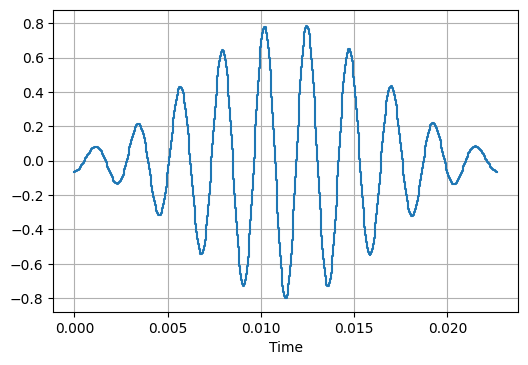

In [4]:
wave_data, sr = librosa.load('./sounds/sine-440.wav')
# wave_chunk = wave_data[0.8 * sr : 0.8 * sr + window_size]
wave_windowed = wave_data[5000:5000+window_size] * np.hamming(window_size)

librosa.display.waveshow(wave_windowed, sr=sr)
plt.show()

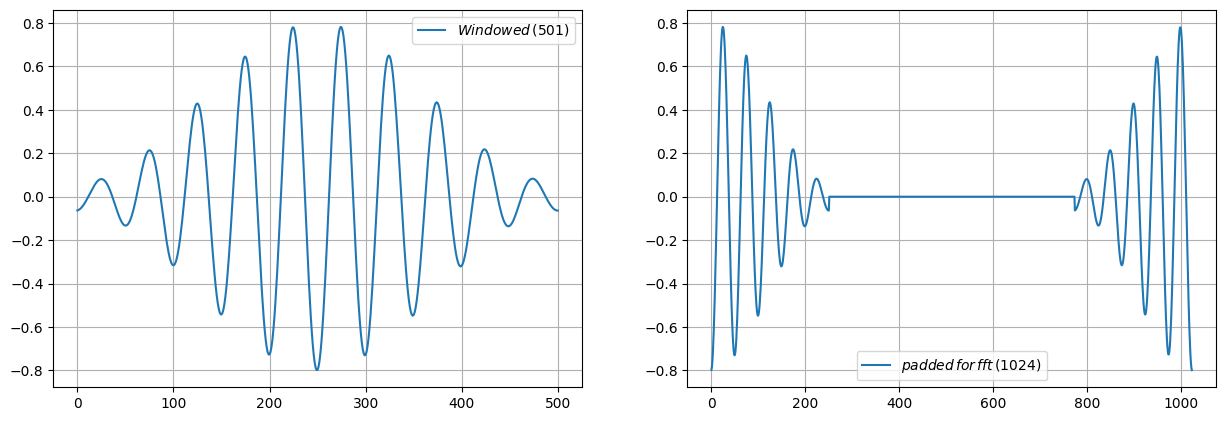

In [5]:
# zero-padding (now signal is centered around time=0)
n_fft = 1024
wave_for_fft = np.zeros(n_fft)
wave_for_fft[:hM1] = wave_windowed[hM2:]
wave_for_fft[n_fft-hM2:] = wave_windowed[:hM2]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(np.arange(0, window_size), wave_windowed, label='$Windowed \, (501)$')
axs[1].plot(np.arange(0, n_fft), wave_for_fft, label='$padded \, for \, fft \, (1024)$')
showLegend(axs)
plt.show()

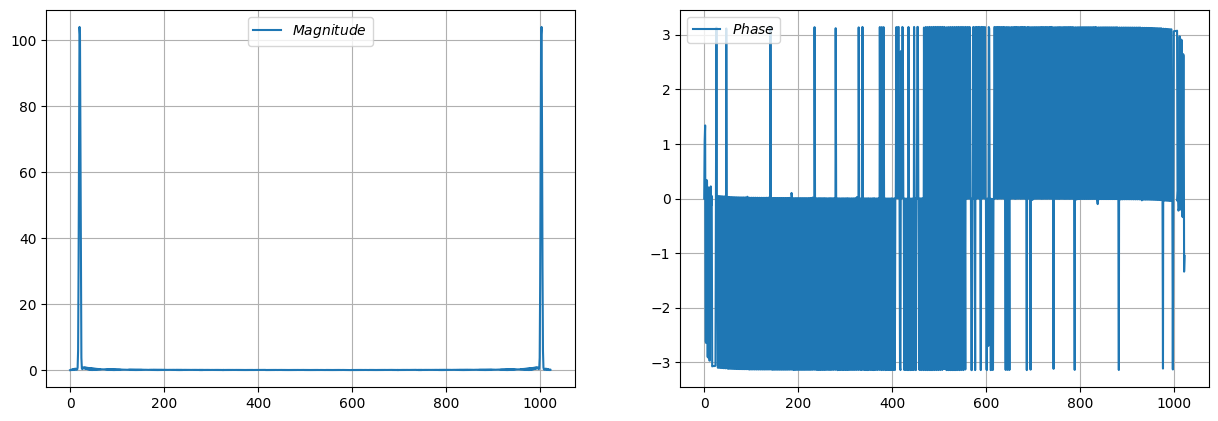

In [6]:
phasor = np.fft.fft(wave_for_fft)
magnitude = np.abs(phasor)
phase = np.angle(phasor)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(np.arange(0, n_fft), magnitude, label='$Magnitude$')
axs[1].plot(np.arange(0, n_fft), phase, label='$Phase$')
showLegend(axs)
plt.show()

In [26]:
print(peakDetection(magnitude, -40))
print(len(peakDetection(magnitude, -40)))

(array([   0,    2,    4,    6,    8,   10,   12,   19,   27,   29,   31,
         33,   35,   37,   39,   41,   43,   45,   47,   49,   51,   53,
         55,   57,   59,   61,   63,   65,   67,   70,   72,   74,   76,
         78,   80,   82,   84,   86,   88,   90,   92,   94,   96,   98,
        100,  102,  104,  106,  108,  110,  112,  114,  117,  119,  121,
        123,  125,  127,  129,  131,  133,  135,  137,  139,  141,  143,
        145,  147,  149,  151,  153,  155,  157,  159,  161,  164,  166,
        168,  170,  172,  174,  176,  178,  180,  182,  184,  186,  188,
        190,  192,  194,  196,  198,  200,  202,  204,  206,  208,  211,
        213,  215,  217,  219,  221,  223,  225,  227,  229,  231,  233,
        235,  237,  239,  241,  243,  245,  247,  249,  251,  253,  256,
        258,  260,  262,  264,  266,  268,  270,  272,  274,  276,  278,
        280,  282,  284,  286,  288,  290,  292,  294,  296,  298,  300,
        303,  305,  307,  309,  311,  313,  315,  

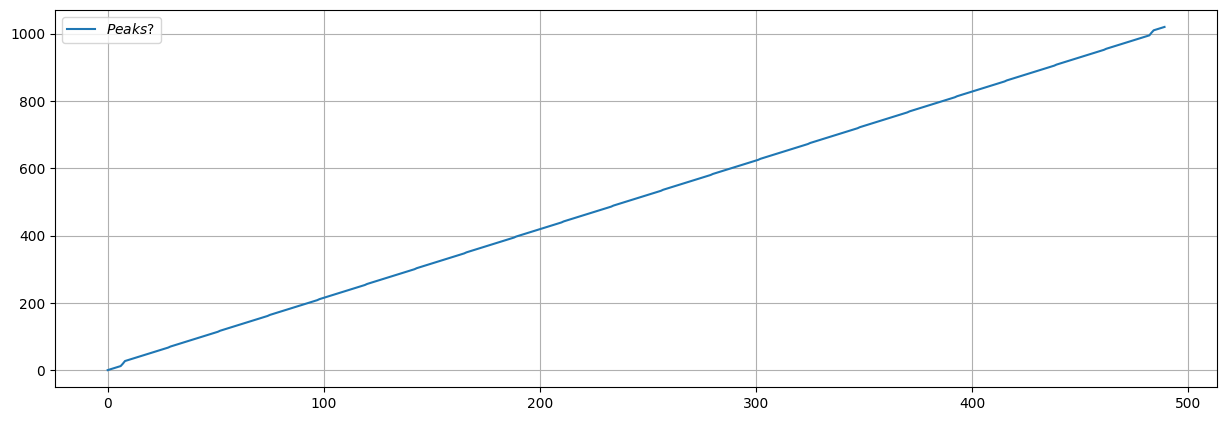

In [24]:

peaks = peakDetection(magnitude, -40)
fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(np.arange(0, len(peaks)), peaks, label='$Peaks?$')
showLegend(axs)
plt.show()